__Задача #5 (3.2)__

Реализовать алгоритм локальной навигации в модели Клейнберга и визуализировать его результаты (на изображении сети показать путь построенный с помощью навигации) и построить график, показывающий зависимость расстояния до целевого узла в зависимости от номера алгоритма. Показать не менее 3х сценариев на 3х решетка с разным показателем $\alpha$: $\{0, 1, 2\}$

In [1]:
import networkx as nx
import random as rand
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# функция для вычисления расстояния между конкретной парой узлов
def distance(a, b):
    i = a[0] # первая координата первой вершины
    j = a[1] # вторая координата первой вершины
    k = b[0] # первая координата второй вершины
    l = b[1] # вторая координата второй вершины
    # евклидово расстояние в двумерном пространстве
    dist = ((i - k)**2 + (j - l)**2)**0.5
    return dist

In [14]:
# представление сети в модели Клейнберга в виде решетки
# передается как один из аргументов в функцию отрисовки графа
def graph_coordinates(G):
    coordinates = {}
    for node in G.nodes():
        coordinates[node] = np.array([node[0], node[1]])
    return coordinates

In [13]:
# случайным образом выбираем начальный и конечный узлы пути
# возвращаем их как кортежи вида (координата1, координата2)
def important_nodes(n):
    start_node = tuple([np.random.randint(0, 10) for i in range(2)])
    end_node = tuple([np.random.randint(0, 10) for i in range(2)])
    return start_node, end_node

In [51]:
# создание сети по модели Клейнберга
# h - количество узлов (h x h - размерность решетки)
# alpha - показатель степени, используемый при вычислении вероятности
# образования длинной связи (long link) с каждым узлом
def test_network(h, alpha):
    G = nx.navigable_small_world_graph(n = h, r = alpha)
    return G

In [37]:
def local_navigation(G):
    
    im_n = important_nodes(G.number_of_nodes())
    start_node = im_n[0] # начальный узел обхода
    end_node = im_n[1] # конечный узел обхода
    pathes = [start_node] # список для хранения обойденных вершин
    distances = [] # список для хранения расстояний на каждом шаге
    # расстояние между стартовой и конечной вершиной
    max_dis = distance(start_node, end_node)
    dis = 0 # 
    steps = [] # номера шагов алгоритма
    step = 0
    ro = 1 # расстояние между конечным узлом и текущим
    # если ro = 0, то текущая и конечная вершина совпадают, признак завершения обхода
    
    while ro != 0:
        step = step + 1 
        steps.append(step)
        ur = pathes[-1] # рассматриваем данный узел
        neighbours = list(G.neighbors(ur)) # список соседних узлов к рассматриваемому
        # словарь для хранения пар "расстояние от узла до конечного узла - номер узла"
        to_end_node_distances = {distance(end_node, node): node for node in neighbours} 
        min_dis = min(distance(end_node, node) for node in neighbours) 
        # следующая вершина в обходе будет той, которая
        # имеет наименьшее расстояние до конечного узла 
        # из всех соседей текущей вершины
        nex = to_end_node_distances[min_dis]
        # расстояние пройденное на данном шаге
        dis = min_dis
        distances.append(dis)
        # обновление значение критерия для прекращения обхода
        ro = distance(end_node, nex)
        # обновляем список посещенных при обходе узлов
        pathes.append(nex)
        
    steps = [0] + steps
    print('Количество шагов:', len(steps))
    distances = [max_dis] + distances
    print('Расстояния до целевого узла на каждом шагу:')
    print(*distances, sep = ' -> ')
    print('Старт пути в вершине', start_node)
    print('Траектория пути:')
    print(*pathes, sep = ' -> ')
    print('Окончание пути в вершине', end_node)
    return steps, distances, pathes

In [40]:
def step_dist_plot(steps, distances):
    x = steps
    y = distances
    plt.xlim(0, max(x) + 1)
    plt.ylim(0, max(y) + 1)
    plt.xlabel('Номер шага')
    plt.ylabel('Расстояние до конечного узла')
    plt.title('Отображение хода локальной навигации для модели Клейнберга')
    plt.step(x, y, linewidth = 4.5)
    plt.show()

In [49]:
def local_navigation_visualize(G, pathes):
    
    n1 = len(pathes) - 1
    start_node = pathes[0] # стартовый узел траектории
    end_node = pathes[n1] # конечный узел траектории
    pe = [] # список для хранения ребер из траектории
    for i in range(n1):
        pe.append((pathes[i], pathes[i + 1]))
    # ориентация сети на плоскости в виде двумерной решетки
    pos = graph_coordinates(G)
    
    # отрисовка исходного графа
    nx.draw(G, with_labels = True, pos = pos, edge_color = 'black', 
            node_color='yellow', font_size = 8, arrow_size = 5)
    # отрисовка пройденного пути
    nx.draw(G, node_color='red', pos = pos, edge_color = 'red', nodelist = pathes[1:n1],  
        edgelist = pe, arrowsize = 20)
    
    nx.draw(G,node_color=['lime','lightblue'], pos = pos, 
            nodelist = [start_node, end_node], edgelist = [])
    plt.show()

### 3 теста при решетке 15 x 15
### $\alpha$: $\{0, 1, 2\}$

Количество шагов: 2
Расстояния до целевого узла на каждом шагу:
1.0 -> 0.0
Старт пути в вершине (4, 8)
Траектория пути:
(4, 8) -> (4, 7)
Окончание пути в вершине (4, 7)


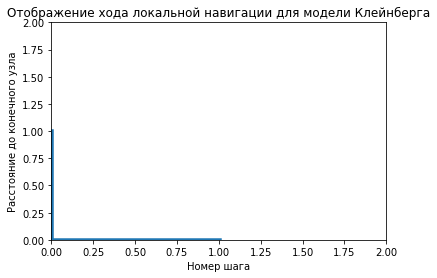

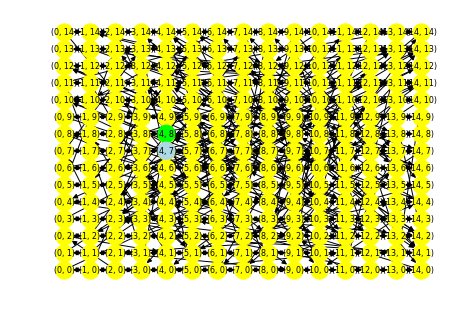

In [57]:
G = test_network(15, 0)
loc = local_navigation(G)
steps = loc[0]
distances = loc[1]
pathes = loc[2]
step_dist_plot(steps, distances)
local_navigation_visualize(G, pathes)

Количество шагов: 5
Расстояния до целевого узла на каждом шагу:
5.0990195135927845 -> 4.123105625617661 -> 3.1622776601683795 -> 1.0 -> 0.0
Старт пути в вершине (1, 6)
Траектория пути:
(1, 6) -> (2, 6) -> (3, 6) -> (5, 7) -> (6, 7)
Окончание пути в вершине (6, 7)


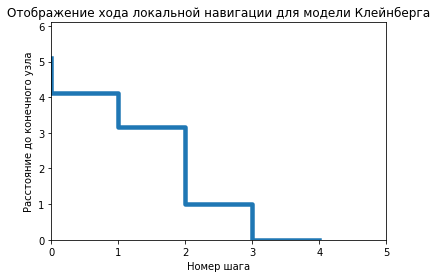

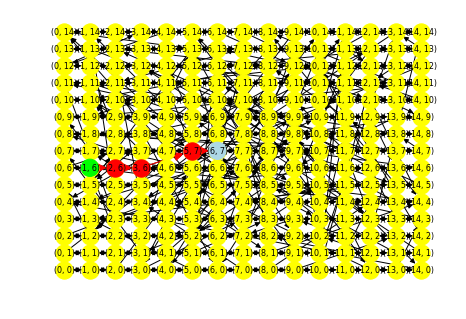

In [56]:
G = test_network(15, 1)
loc = local_navigation(G)
steps = loc[0]
distances = loc[1]
pathes = loc[2]
step_dist_plot(steps, distances)
local_navigation_visualize(G, pathes)

Количество шагов: 6
Расстояния до целевого узла на каждом шагу:
5.0 -> 4.0 -> 3.0 -> 2.0 -> 1.0 -> 0.0
Старт пути в вершине (1, 9)
Траектория пути:
(1, 9) -> (1, 8) -> (1, 7) -> (1, 6) -> (1, 5) -> (1, 4)
Окончание пути в вершине (1, 4)


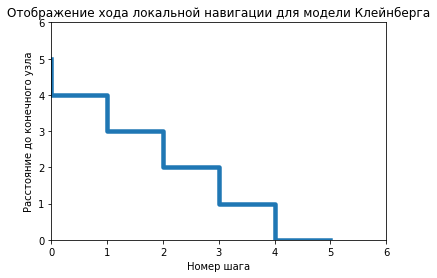

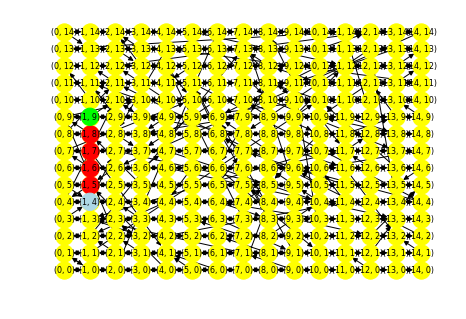

In [55]:
G = test_network(15, 2)
loc = local_navigation(G)
steps = loc[0]
distances = loc[1]
pathes = loc[2]
step_dist_plot(steps, distances)
local_navigation_visualize(G, pathes)